In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Celine\AppData\Local\Temp\ipykernel_8952\861595690.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


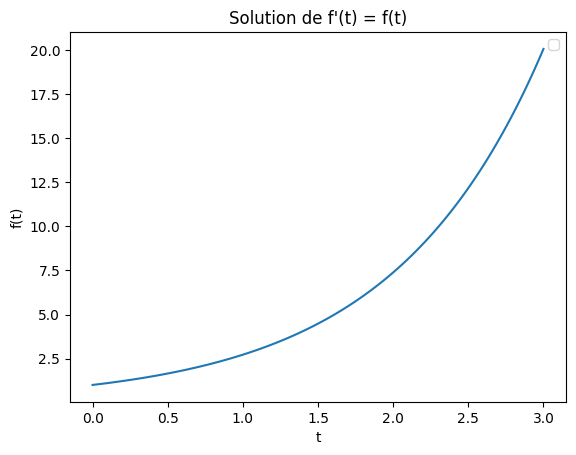

In [12]:
# Résoudre l'équation analytiquement
def exact_solution(t):
    return np.exp(t)

#Tracer la courbe
t_values = np.linspace(0, 3, 100)
f_values = exact_solution(t_values)

plt.plot(t_values, f_values)
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Solution de f'(t) = f(t)")
plt.legend()
plt.show()

In [16]:
#Résoudre l'équation différentiel avec la méthode Euler
def euler(f0, h, n):
    t_values = [0]
    f_values = [f0]

    for _ in range(n):
        f_next = f_values[-1] + h * f_values[-1] #formule du passage du continu au discret d’Euler
        t_next = t_values[-1] + h
        t_values.append(t_next)
        f_values.append(f_next)

    return t_values, f_values
def exact_solution_euler(t):
    return math.exp(t)

f0 = 1  
h = 0.5  
n = 3  

t_vals, f_vals = euler(f0, h, n)
exact_vals = [exact_solution_euler(t) for t in t_vals]
errors = [abs(exact - approx) for exact, approx in zip(exact_vals, f_vals)]

print("t\t Euler \t\t Exacte \t Erreur")
for i in range(len(t_vals)):
    print(f"{t_vals[i]:.2f} \t {f_vals[i]:.5f} \t {exact_vals[i]:.5f} \t {errors[i]:.5f}")

t	 Euler 		 Exacte 	 Erreur
0.00 	 1.00000 	 1.00000 	 0.00000
0.50 	 1.50000 	 1.64872 	 0.14872
1.00 	 2.25000 	 2.71828 	 0.46828
1.50 	 3.37500 	 4.48169 	 1.10669


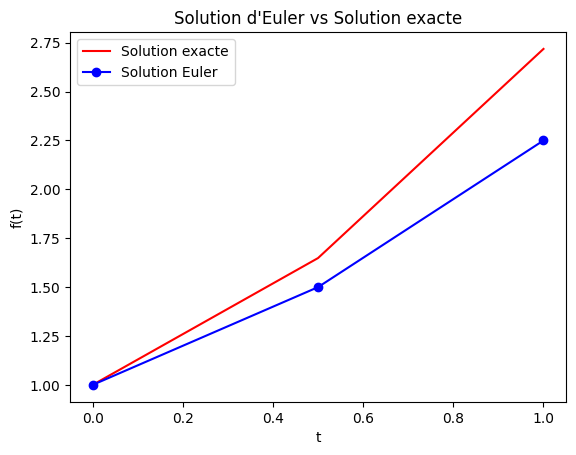

In [53]:
plt.plot(t_vals, f_exact_vals, 'r-', label="Solution exacte")
plt.plot(t_vals, f_vals, 'bo-', label="Solution Euler")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title(f"Solution d'Euler vs Solution exacte")
plt.legend()
plt.show()

In [54]:
#Calculer la MSE entre les différentes solutions
def mean_squared_error(f_approx, f_exact):
    errors = (f_approx - f_exact) ** 2
    return np.mean(errors)
    
f_exact_vals = exact_solution(t_vals)
mse = mean_squared_error(f_vals, f_exact_vals)

print(f"MSE = {mse:.6f}")

MSE = 0.080469


In [55]:
#Tableau comparatif 
f0 = 1  
t_end = 2  
h_values = [0.1, 0.5]

results = []

for h in h_values:
    t_vals, f_vals = euler(f0, h, t_end)
    f_exact_vals = exact_solution(t_vals)
    mse = mean_squared_error(f_vals, f_exact_vals)

    for i in range(len(t_vals)):
        results.append([h, t_vals[i], f_vals[i], f_exact_vals[i], (f_vals[i] - f_exact_vals[i]) ** 2])

    print(f"\nMSE pour h = {h}: {mse:.6f}")


MSE pour h = 0.1: 0.000052

MSE pour h = 0.5: 0.080469


In [58]:
# Création du tableau comparatif
df = pd.DataFrame(results, columns=["h", "t", "Euler", "Exact e^t", "Erreur²"])
print(df.to_string(index=False))

  h   t  Euler  Exact e^t  Erreur²
0.1 0.0   1.00   1.000000 0.000000
0.1 0.1   1.10   1.105171 0.000027
0.1 0.2   1.21   1.221403 0.000130
0.5 0.0   1.00   1.000000 0.000000
0.5 0.5   1.50   1.648721 0.022118
0.5 1.0   2.25   2.718282 0.219288


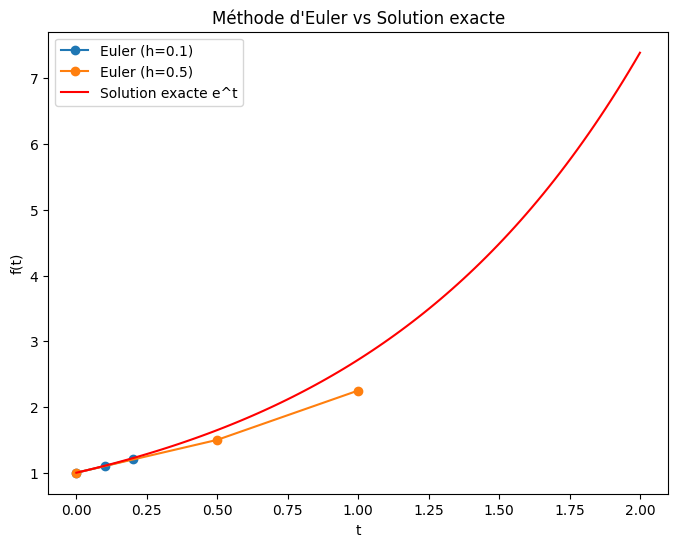

In [60]:
plt.figure(figsize=(8, 6))
for h in h_values:
    t_vals, f_vals = euler(f0, h, t_end)
    plt.plot(t_vals, f_vals, 'o-', label=f"Euler (h={h})")

t_exact = np.linspace(0, t_end, 100)
f_exact = exact_solution(t_exact)
plt.plot(t_exact, f_exact, 'r-', label="Solution exacte e^t")

plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Méthode d'Euler vs Solution exacte")
plt.legend()
plt.show()

In [ ]:
#Impact de la taille de h sur la MSE
h = 0.1 ==> MSE plus faible, approximation plus proche de la vraie valeur (de la solution exacte).

h = 0.5 ==> MSE plus élevée, approximation plus loin de la vraie valeur (de la solution exacte).

Donc ==> plus le pas h est petit, plus la méthode d Euler est précise, mais il faut plus d itérations.